In [1]:
#IMPORING LIBRARIES - STEP 0

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#DATA SOURCING - STEP 1

uber=pd.read_csv(r"C:\Users\pc-pc\Downloads\Uber Request Data.csv")
uber

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
5,3879,Airport,1.0,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59
6,4270,Airport,1.0,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15
7,5510,Airport,1.0,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52
8,6248,City,1.0,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51
9,267,City,2.0,Trip Completed,11/7/2016 6:46,11/7/2016 7:25


In [3]:
### DATA CLEANING - STEP 2

#'Requested timestamp' & 'Drop timestamp' are not in a proper format. hence, we look at the data types of all the attributes. 
#It is a process in data cleaning

print(uber.dtypes)
print(uber.size)

Request id             int64
Pickup point          object
Driver id            float64
Status                object
Request timestamp     object
Drop timestamp        object
dtype: object
40470


In [4]:
#changing the datatype to 'datetime'

uber['Request timestamp'] = pd.to_datetime(uber['Request timestamp'])
uber['Drop timestamp']=pd.to_datetime(uber['Drop timestamp'])

#drop duplicates
uber=uber.drop_duplicates()

In [5]:
#datatype of 'Request timestamp' and 'Drop timestamp' is changed to 'datetime'

print(uber.dtypes)
print(uber.size)

Request id                    int64
Pickup point                 object
Driver id                   float64
Status                       object
Request timestamp    datetime64[ns]
Drop timestamp       datetime64[ns]
dtype: object
40470


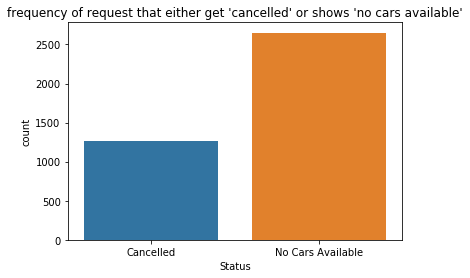

In [6]:
##QUESTION - 1 

##(i)Visually identify the most pressing problems for Uber.
##   (*) Create plots to visualise the frequency of requests that get cancelled or show 'no cars available'

uber_1=pd.DataFrame(uber.loc[uber['Status'].isin(['Cancelled','No Cars Available'])])
plt.title("frequency of request that either get 'cancelled' or shows 'no cars available'")
sns.countplot(uber_1['Status'])
plt.show()

# ANALYSIS RESULT - we see that the frequency of 'no cars available' is comparatively high. hence its a pressing problem!

In [7]:
## (*) identify the most problematic types of requests (city to airport / airport to city etc.)

uber_from_airport_to_city=pd.DataFrame(uber.loc[uber['Pickup point'].isin(['Airport'])])
uber_from_city_to_airport=pd.DataFrame(uber.loc[uber['Pickup point'].isin(['City'])])
uber

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51
9,267,City,2.0,Trip Completed,2016-11-07 06:46:00,2016-11-07 07:25:00


In [8]:
#create a new column to categorise the time into 4 different slots 
#NOTE: 0:00 - 6:00 = 'Early morning'
#      6:01 - 12:00 = 'Morning'
#      12:01 - 6:00 = 'Noon'
#      6:01 - 23:59 = "Late Evening"
uber['hour']=uber['Request timestamp'].dt.hour
uber['time slots'] = pd.cut(uber['hour'], [0,6,12,18,24], labels=["Early morning", "Morning", "Evening","Late Evening"],right=False)

In [9]:
## (*) identify the most problematic types of requests (city to airport / airport to city etc.)

uber_from_airport_to_city=pd.DataFrame(uber.loc[uber['Pickup point'].isin(['Airport'])])
uber_from_city_to_airport=pd.DataFrame(uber.loc[uber['Pickup point'].isin(['City'])])

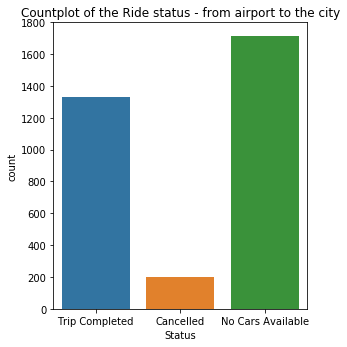

In [10]:
#### FROM AIPORT -----> THE CITY

plt.subplot(1,2,1)
plt.title("Countplot of the Ride status - from airport to the city")
sns.countplot(x=uber_from_airport_to_city['Status'])
plt.gcf().set_size_inches(10, 5.27)
plt.show()


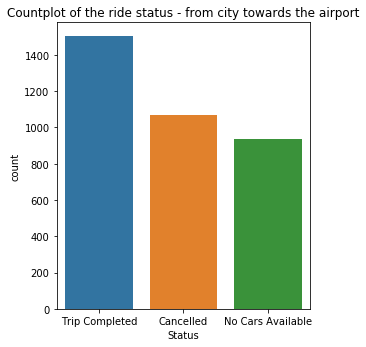

In [11]:
### FROM THE CITY -----> THE AIRPORT

plt.subplot(1,2,2)
plt.title("Countplot of the ride status - from city towards the airport")
sns.countplot(x=uber_from_city_to_airport['Status'])
plt.gcf().set_size_inches(10, 5.27)
plt.show()

#ANALYSIS RESULT - 

#    By comparing the two countplots for rides from city-to-airport and from airport-to-city, 
#    we can see that the ‘no cars available’ in ‘Airport-to-City’ case TOPS when compared to ‘city-to-airport’ case.

#   But, this difference is roughly around 700 request which is less when compared to the ‘Cancelled’ state. 

#   When you compare ‘airport-to-city’ and ‘city-to-airport’, the no. of requests which are cancelled is roughly 
#   around 800 more in ‘city-to-airport’ than ‘airport-to-city’.

#   Hence the cab request from ‘CITY-TO-AIRPORT’ is the MOST PROBLEMATIC KIND OF REQUEST.



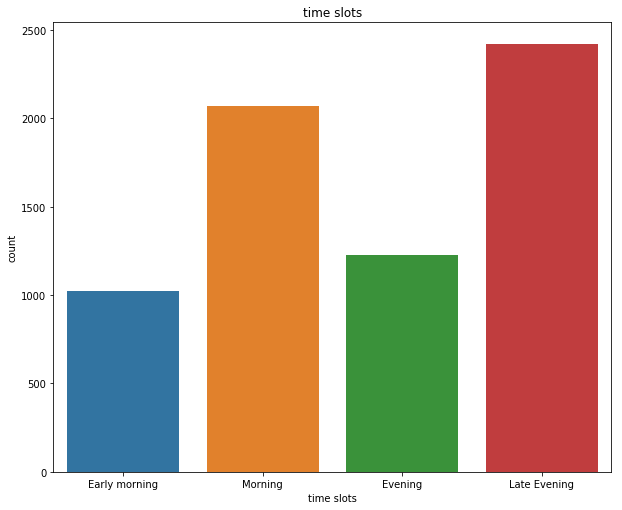

In [12]:
## (*) identify the most problematic types of time slots (early mornings, late evenings etc.) using plots

sns.countplot(uber['time slots'])
plt.title("time slots")
plt.gcf().set_size_inches(10, 8.27)
plt.show()

## ANALYSIS RESULT : Here, Late evenings are said to be the most problematic type of time slots.

The GAP value: 3914


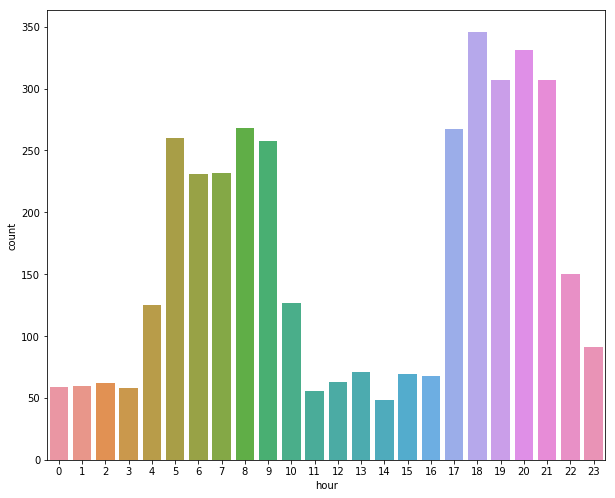

In [13]:
## QUESTION - 2 
## Find out the gap between supply and demand and show the same using plots.
uber_gap=uber[np.logical_not(uber["Status"].isin(["Trip Completed"]))]
print("The GAP value:",uber_gap['Status'].count())

#Find the time slots when the highest gap exists

sns.countplot(x=uber_gap['hour'])
plt.gcf().set_size_inches(10, 8.27)
plt.show()

In [14]:
## Find the time slots when the highest gap exists
time=uber.groupby('time slots')
gap_time_slot=time['Status'].count().sort_values(ascending=False).head(1)
print(gap_time_slot)

# ANALYSIS RESULT : we can see that the gap_time_slot displays 'Late evening' as the time slot value.
print("-------")

uber_list=uber[(uber["time slots"].isin(["Late Evening"]))]

print("the most number of times request are made in the peak time slot is : ",uber_list['hour'].value_counts().max())
print("the requested value is said to come at time :",uber_list['hour'].value_counts().idxmax())
time_slot_hour=uber_list['hour'].value_counts().idxmax()

#ANALYSIS RESULT - we can see that, In 'Late Evening' time slot, 18th hour is considered to be the one which is creating a large GAP.


time slots
Late Evening    2422
Name: Status, dtype: int64
-------
the most number of times request are made in the peak time slot is :  510
the requested value is said to come at time : 18


In [15]:
# (*)Find the types of requests (city-airport or airport-city) for which the gap is the most severe in the identified time slots.
request_type=uber_list[uber_list.hour == time_slot_hour]
print(request_type.mode().head(1))

#ANALYSIS RESULT : we can see that the Airport to city is the request type for which the gap is high in the time slot 'Late evening'

   Request id Pickup point  Driver id             Status   Request timestamp  \
0         866      Airport       69.0  No Cars Available 2016-11-07 18:09:00   

  Drop timestamp  hour    time slots  
0            NaT  18.0  Late Evening  


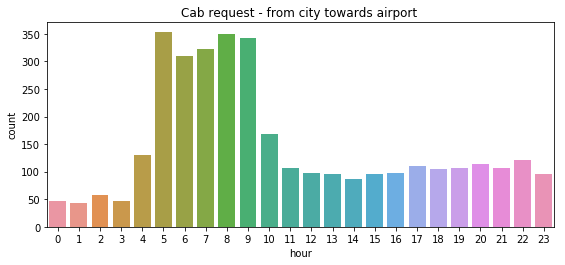

In [19]:
### FROM THE CITY -----> THE AIRPORT
plt.subplot(2,2,2)
plt.title("Cab request - from city towards airport ")
sns.countplot(x=uber_from_city_to_airport['hour'])
plt.gcf().set_size_inches(20, 8.27)
plt.show()

## ANALYSIS RESULT - Most of the request happens in the morning from 5AM to 9AM

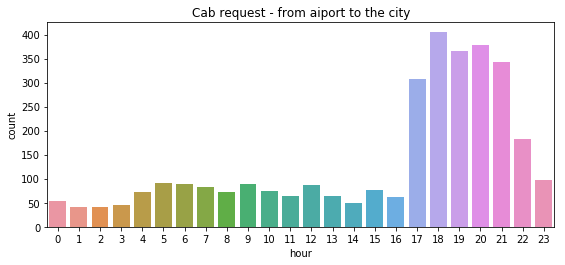

In [18]:
### FROM AIRPORT ---> The CITY
plt.subplot(2,2,1)
plt.title("Cab request - from aiport to the city")
sns.countplot(x=uber_from_airport_to_city['hour'])
plt.gcf().set_size_inches(20, 8.27)
plt.show()

#ANALSYS RESULT - Most of the request happens in the night time from the Airport to the City.